<a href="https://colab.research.google.com/github/ashutosh1608/face_counter/blob/master/Part_2_Training_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 13785 (delta 0), reused 0 (delta 0), pack-reused 13784
Receiving objects: 100% (13785/13785), 12.37 MiB | 22.14 MiB/s, done.
Resolving deltas: 100% (9407/9407), done.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-05 10:20:40--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.55MB/s    in 3m 21s  

2020-07-05 10:24:02 (1.18 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

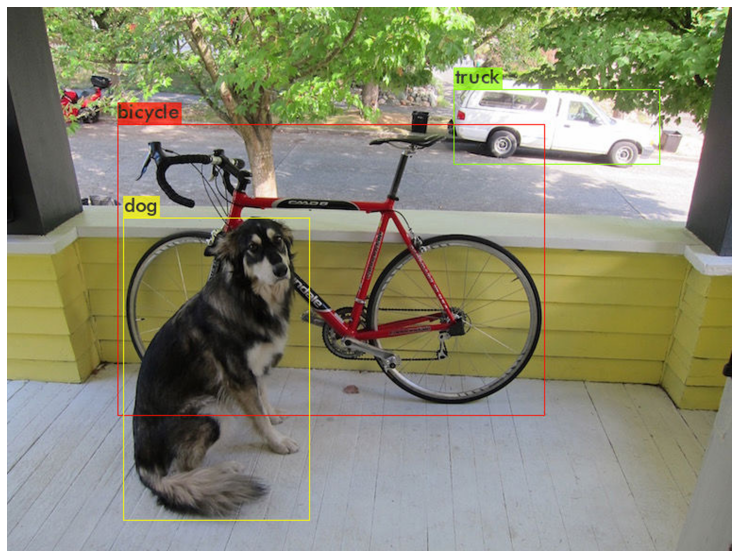

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Head Counter/back"

custom_yolov3_1000.weights  custom_yolov3_final.weights
custom_yolov3_2000.weights  custom_yolov3_last.weights


In [ ]:
!unzip "/content/drive/My Drive/Head Counter/hh.zip" -d "/content/Human head"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Human head/content/OID/Dataset/train/Human head/35e9af288c765828.jpg  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/e3346378ec3af7b5.jpg  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/87241d477cf0d346.txt  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/40bba61938bd6f2c.txt  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/dee07e8e490302dc.txt  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/eb0e7db00fee15b6.jpg  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/b7c99e66a1e4d68c.txt  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/bf10293882696548.txt  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/d53e329b469185c5.jpg  
  inflating: /content/Human head/content/OID/Dataset/train/Human head/49f9541c465a1bba.txt  
  inflating: /conte

In [ ]:
!cp "/content/Human head/content/OID/Dataset/train/Human head" -r "/content/darknet/data/obj"

In [ ]:
#!cp "/content/darknet/cfg/yolov3.cfg" "/content/drive/My Drive/Head Counter/custom_yolov3.cfg"

In [ ]:
#!cp "/content/darknet/data/obj.data" "/content/drive/My Drive/Head Counter/obj.data"

In [ ]:
#!cp "/content/darknet/data/obj.names" "/content/drive/My Drive/Head Counter/obj.names"

In [ ]:
!cp "/content/drive/My Drive/Head Counter/custom_yolov3.cfg" "/content/darknet/cfg/custom_yolov3.cfg"

In [ ]:
!cp "/content/drive/My Drive/Head Counter/obj.data" "/content/darknet/data/obj.data"

In [ ]:
!cp "/content/drive/My Drive/Head Counter/obj.names" "/content/darknet/data/obj.names"

In [ ]:
!python "/content/drive/My Drive/Head Counter/generate_train.py"

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-07-04 22:13:30--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  5.46MB/s    in 24s     

2020-07-04 22:13:54 (6.45 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!ln -s "/content/drive/My Drive/Head Counter/" /short

In [ ]:
!ls /short/back

custom_yolov3_1000.weights  custom_yolov3_final.weights
custom_yolov3_2000.weights  custom_yolov3_last.weights


In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/custom_yolov3.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 121864, rewritten_bbox = 0.062365 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.545392, GIOU: 0.503151), Class: 0.985122, Obj: 0.230647, No Obj: 0.000838, .5R: 0.500000, .75R: 0.250000, count: 4, class_loss = 0.966750, iou_loss = 1.050160, total_loss = 2.016910 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.547345, GIOU: 0.529283), Class: 0.979020, Obj: 0.110180, No Obj: 0.000276, .5R: 0.666667, .75R: 0.222222, count: 9, class_loss = 1.874757, iou_loss = 2.081589, total_loss = 3.956346 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.523682, GIOU: 0.415111), Class: 0.928159, Obj: 0.009029, No Obj: 0.000051, .5R: 0.500000, .75R: 0.000000, count: 4, class_loss = 0.994467, iou_loss = 1.276779, total_loss = 2.271246 
 total_bbox = 121881, rewritten_bbox = 0.062356 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.446247, GIOU:

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' custom_yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' custom_yolov3.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x

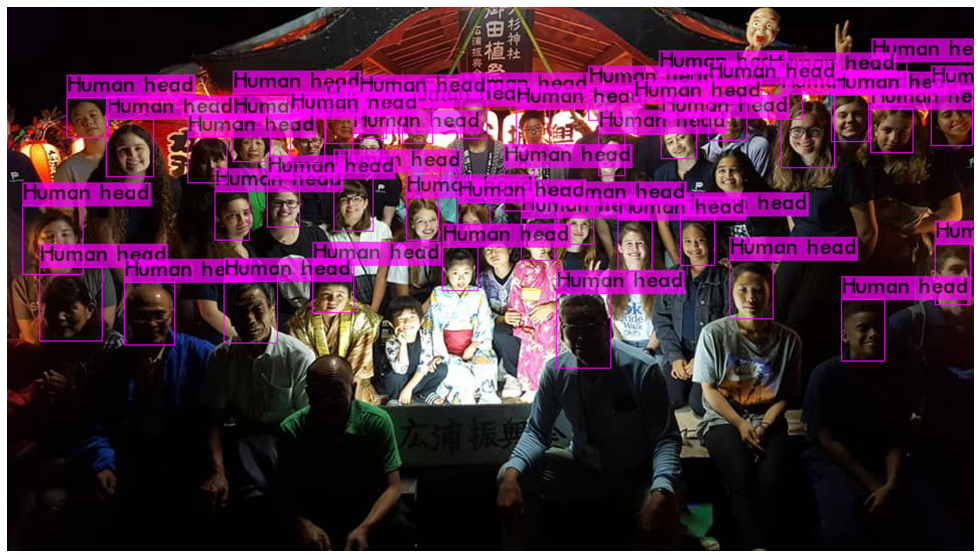

In [ ]:
# look we can run another detection!
!./darknet detector test data/obj.data cfg/custom_yolov3.cfg /short/back/custom_yolov3_final.weights "/content/darknet/data/test/66043122_1310726495769344_7711353831367376896_n.jpg" -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!cp "/content/96254998_2870142799760226_190097417184477184_n.jpg" "/content/darknet/data/test/"

In [ ]:
!python "/content/drive/My Drive/Head Counter/generate_test.py"

In [ ]:
!./darknet detector test data/obj.data cfg/custom_yolov3.cfg /short/back/custom_yolov3_final.weights -dont_show -ext_output < data/test.txt > /short/result.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 BF
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x

In [ ]:
!unzip "/content/drive/My Drive/Head Counter/train_HNzkrPW (1).zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/image_data/13200.jpg  
  inflating: /content/image_data/13201.jpg  
  inflating: /content/image_data/13202.jpg  
  inflating: /content/image_data/13203.jpg  
  inflating: /content/image_data/13204.jpg  
  inflating: /content/image_data/13205.jpg  
  inflating: /content/image_data/13206.jpg  
  inflating: /content/image_data/13207.jpg  
  inflating: /content/image_data/13208.jpg  
  inflating: /content/image_data/13209.jpg  
  inflating: /content/image_data/13210.jpg  
  inflating: /content/image_data/13211.jpg  
  inflating: /content/image_data/13212.jpg  
  inflating: /content/image_data/13213.jpg  
  inflating: /content/image_data/13214.jpg  
  inflating: /content/image_data/13215.jpg  
  inflating: /content/image_data/13216.jpg  
  inflating: /content/image_data/13217.jpg  
  inflating: /content/image_data/13218.jpg  
  inflating: /content/image_data/13219.jpg  
  inflating: /content/image_data/13220.jpg  
  in

In [ ]:
!ls "/content"

bbox_train.csv	darknet  drive	image_data  sample_data  train.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!cp "/content/drive/My Drive/Head Counter/test_Rj9YEaI.csv" "/content/test.csv"

In [ ]:
test=pd.read_csv("/content/test.csv")
test=list(test["Name"])
test[:5]

['10005.jpg', '10009.jpg', '10015.jpg', '10022.jpg', '10023.jpg']

In [ ]:
import os
files=[]
os.chdir("/content/image_data")
for filename in os.listdir(os.getcwd()):
  if filename.endswith(".jpg"):
    files.append(filename)
files[:5]

['11181.jpg', '16494.jpg', '11658.jpg', '16383.jpg', '11452.jpg']

In [ ]:
!cp "/content/image_data" -r "/content/darknet/data/test/"

In [ ]:
!rm -rf "/content/darknet/data/test"

In [ ]:
!mv "/content/image_data" "/content/darknet/data/"

In [ ]:
!python "/content/drive/My Drive/Head Counter/generate_test.py"

In [ ]:
import os

image_files = []
os.chdir(os.path.join("data", "test"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        if filename in test:
            image_files.append("data/test/" + filename)
os.chdir("..")
with open("test.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
os.chdir("/content/darknet/")

In [ ]:
!./darknet detector test data/obj.data cfg/custom_yolov3.cfg /short/back/custom_yolov3_final.weights -dont_show -ext_output < data/test.txt > /short/result.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 BF
   9 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x